In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pp

In [4]:
bankloans = pd.read_csv('bankloans.csv')

In [5]:
bankloans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [7]:
bankloans.info()
# ouput variable ie Dafauly has null values, these should be treated before model development

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [9]:
bankloans.columns
# ed - education
# default - could not repay loans in time or missed emi

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [12]:
bankloans.dtypes
# all are int or float so we can go directly to numeric summary

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [13]:
# Defining function for summary, while calculating quantiles use dropna to get actual picture

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [15]:
summary_num = bankloans.apply(lambda x: var_summary(x))
summary_num.T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,850.0,0.0,29775.000000,35.029412,34.000000,8.041432,64.664623,20.000000,21.000000,23.000000,25.000000,29.000000,34.000000,41.000000,47.000000,49.000000,53.000000,56.00000
ed,850.0,0.0,1454.000000,1.710588,1.000000,0.927784,0.860783,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,5.00000
employ,850.0,0.0,7281.000000,8.565882,7.000000,6.777884,45.939706,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,13.000000,18.000000,21.550000,29.000000,33.00000
address,850.0,0.0,7116.000000,8.371765,7.000000,6.895016,47.541251,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,12.000000,19.000000,22.550000,26.510000,34.00000
income,850.0,0.0,39674.000000,46.675294,35.000000,38.543054,1485.566998,13.000000,14.490000,17.000000,19.000000,24.000000,35.000000,55.750000,84.000000,115.550000,220.510000,446.00000
debtinc,850.0,0.0,8645.900000,10.171647,8.700000,6.719441,45.150891,0.100000,0.900000,1.900000,2.900000,5.100000,8.700000,13.800000,19.200000,23.510000,31.565000,41.30000
creddebt,850.0,0.0,1340.284021,1.576805,0.885091,2.125840,4.519196,0.011696,0.030349,0.108927,0.178306,0.382176,0.885091,1.898440,3.703304,5.348674,10.285997,20.56131
othdebt,850.0,0.0,2616.970979,3.078789,2.003243,3.398803,11.551864,0.045584,0.162394,0.359900,0.552050,1.045942,2.003243,3.903001,7.111941,9.481105,16.931503,35.19750
default,700.0,150.0,183.000000,0.261429,0.000000,0.439727,0.193360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [16]:
# from abpve summary we can see that Default has only 2 values 1 and 0 so Y is categorical here

In [18]:
report = pp.ProfileReport(bankloans)

In [24]:
report.to_file(output_file = 'profilereport_logreg.html')

In [315]:
bankloans_new = bankloans[bankloans.default.isnull()==1]
bankloans_existing = bankloans[bankloans.default.isnull()==0]
# where we have a value for Default(1 or 0) those are the existing loans for which we know who have defaulted
bankloans_existing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
age         700 non-null int64
ed          700 non-null int64
employ      700 non-null int64
address     700 non-null int64
income      700 non-null int64
debtinc     700 non-null float64
creddebt    700 non-null float64
othdebt     700 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [136]:
# Treating outliers 
def outlier_cap(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [137]:
bankloans_existing = bankloans_existing.apply(lambda x : outlier_cap(x))

In [138]:
bankloans_existing.apply(lambda x : var_summary(x) ).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,700.0,0.0,24393.070000,34.847243,34.000000,7.954735,63.277806,21.000000,21.000000,23.000000,25.000000,29.000000,34.000000,40.000000,46.000000,49.000000,53.000100,53.010000
ed,700.0,0.0,1201.000000,1.715714,1.000000,0.906523,0.821784,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,4.000000
employ,700.0,0.0,5851.070000,8.358671,7.000000,6.566008,43.112459,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,12.000000,18.000000,21.050000,27.000100,27.010000
address,700.0,0.0,5771.070000,8.244386,7.000000,6.721915,45.184140,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,12.000000,18.000000,22.000000,26.000100,26.010000
income,700.0,0.0,31394.100000,44.848714,34.000000,31.942133,1020.299870,15.000000,15.000000,17.000000,19.000000,24.000000,34.000000,55.000000,82.000000,113.000000,190.003000,190.300000
debtinc,700.0,0.0,7155.507000,10.222153,8.600000,6.682160,44.651264,0.900000,0.900000,1.900000,2.900000,5.000000,8.600000,14.125000,19.610000,23.800000,30.700010,30.701000
creddebt,700.0,0.0,1049.190134,1.498843,0.854869,1.788451,3.198555,0.030209,0.030212,0.107029,0.170020,0.369059,0.854869,1.901955,3.621504,5.098264,9.876748,9.891428
othdebt,700.0,0.0,2119.103279,3.027290,1.987567,3.115401,9.705723,0.160936,0.160983,0.376727,0.562232,1.044178,1.987567,3.923065,7.036180,9.501648,17.184554,17.184744
default,700.0,0.0,183.000000,0.261429,0.000000,0.439727,0.193360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
# Checking coree between Default and others

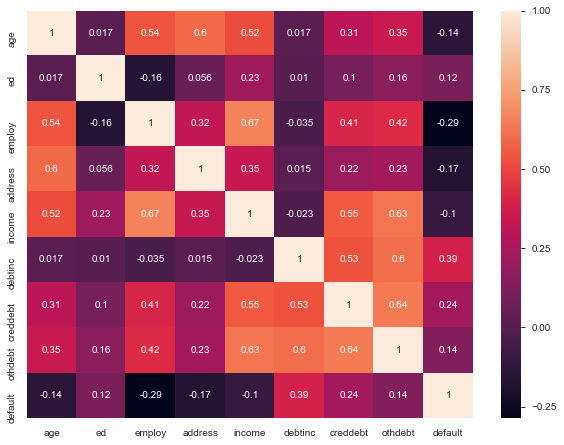

In [140]:
sns.heatmap(bankloans_existing.corr(), annot = True)

In [141]:
# Performing bivariate analysis on the data for p values of variables
# using t test

In [142]:
import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

<Figure size 720x540 with 0 Axes>

In [143]:
dict_tstats = {} 
var = []
t = []
p = []

for x in bankloans_existing.columns:
    tstats = stats.ttest_ind(bankloans_existing[bankloans_existing['default']==1][x],
                             bankloans_existing[bankloans_existing['default']==0][x])
#     print('Variable :' + x ,'T score :' + str(tstats[0].round(3)), tstats[1])
    
    var.append(x)
    t.append(tstats[0].round(3))
    p.append(tstats[1])

df = pd.DataFrame(list(zip(var, t, p)))
df.columns = ['Var', 'Tscore', 'P value']
df


,Var,Tscore,P value
0,age,-3.699,2.335268e-04
1,ed,3.154,1.682360e-03
2,employ,-7.921,9.279946e-15
3,address,-4.431,1.091044e-05
4,income,-2.643,8.394680e-03
5,debtinc,11.141,1.202407e-26
6,creddebt,6.479,1.742801e-10
7,othdebt,3.707,2.260946e-04
8,default,inf,0.000000e+00


In [144]:
# all variables have p values < 0.01 that menas 99% + C1

In [145]:
# checking for monotonicity of variables

In [163]:
pd.qcut?

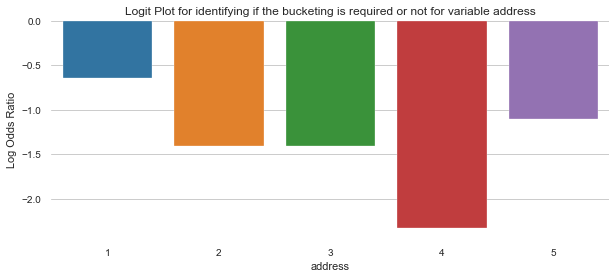

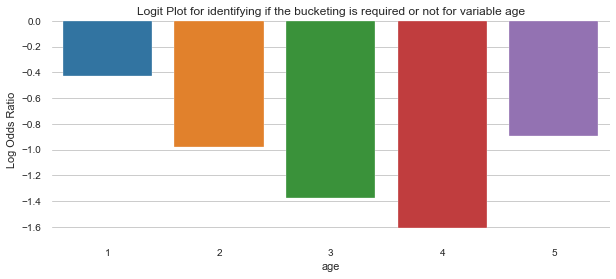

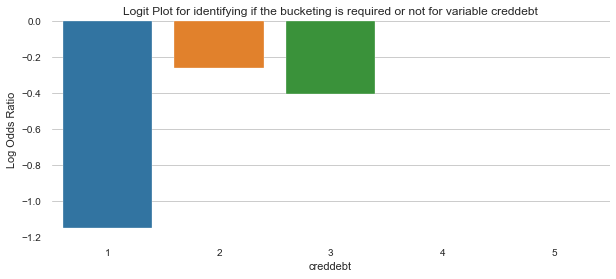

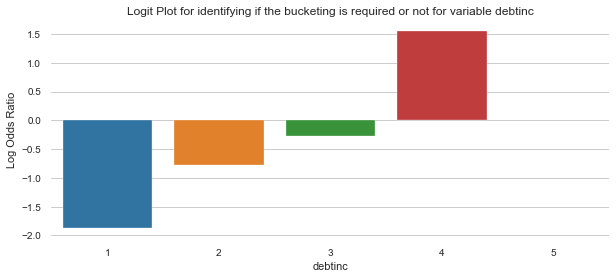

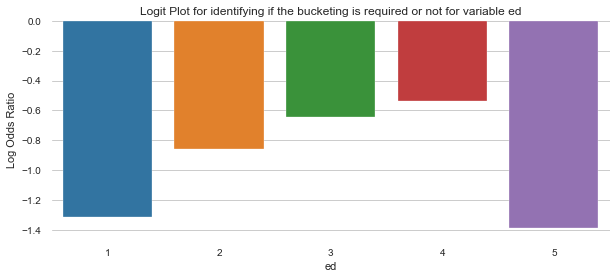

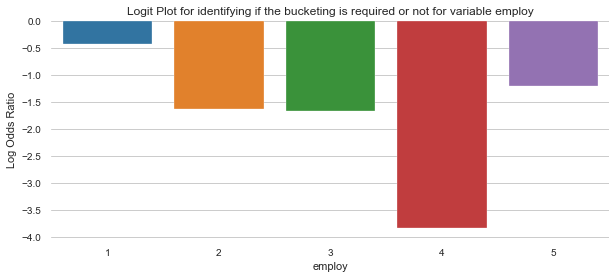

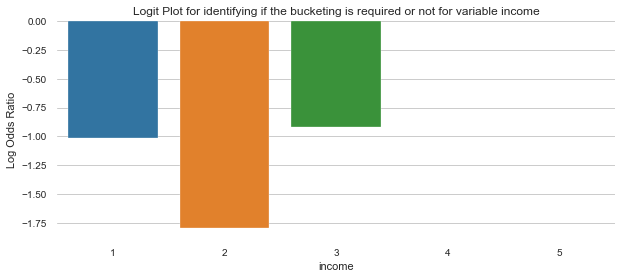

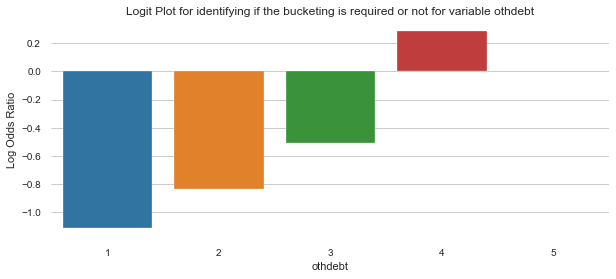

In [171]:
bp = PdfPages('Transformation Plots.pdf')

for x in bankloans_existing.columns.difference(['default']):
    
#     creating bins using pd.cut
    binned = pd.cut(bankloans_existing[x], bins = 5, labels = list(range(1,6)))
    
    binned = binned.dropna()
    
#     calculating ratio of odds = p(y=1)/(1-p(y = 1))

    odds = bankloans_existing.groupby(binned)['default'].sum() / (bankloans_existing.groupby(binned)['default'].count()-bankloans_existing.groupby(binned)['default'].sum())
    odds = np.log(odds)
    
#     visualising log of odds and x variables for monotonicity

    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=odds.index,y=odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(x))
    bp.savefig(fig)

bp.close()

In [173]:
# Variable reduction techniques

In [175]:
# 1. Somer's D value 

# we calculate the AUC and GINi for COMBINATIONS OF Xi & Y
# Gini = 2*AUC-1

In [183]:
somersd_df = pd.DataFrame()
for x in bankloans_existing.columns.difference(['default']):
# defining log reg formula like done in linear reg
    logreg = sm.logit(formula = str('default ~ ')+str(x), data=bankloans_existing)
    result = logreg.fit()
    summ = result.summary()
#     print(summ)
# getting y_score for each X
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']

# calculating SOmer's D value for each Xi & Y combination
    somers_d = 2*metrics.roc_auc_score(bankloans_existing['default'],y_score) - 1
    temp = pd.DataFrame([x,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.559938
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564806
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547045
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.501021
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568222
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.528154
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571691
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564828
         Iterations 5


,Variable Name,SomersD
0,address,0.222384
0,age,0.206403
0,creddebt,0.272378
0,debtinc,0.470601
0,ed,0.147964
0,employ,0.409138
0,income,0.200336
0,othdebt,0.173828


In [184]:
# Now calculating VIF using dmatrices as done in linear regression, VIF = 1/1-R2
# Here also a reg model is made making Xi as tgt and all other X as explaonatory variables
# VIF > 5 means 1/1-R2 >5 or 1-R2 > 1/5 or R2 > 4/5 ie R2 > 80%, which means 80% of info in Xi is explained by all other X vars
# This means presence of multicolinearity

In [194]:
X = bankloans_existing
features = "+".join(bankloans_existing.columns.difference(['default']))
X.head()

a,b = dmatrices(formula_like='default ~ '+ features, data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
# here i will take index of each colm of data and calculate R2 for xi with all other x
vif["features"] = b.columns


print(vif)

   VIF Factor   features
0   34.989407  Intercept
1    1.563287    address
2    2.018512        age
3    2.516961   creddebt
4    3.246393    debtinc
5    1.262185         ed
6    2.204052     employ
7    4.206131     income
8    3.850861    othdebt


In [195]:
vif["R sq"] = 1-1/vif["VIF Factor"]

In [196]:
# vif and R2 are fine for all variables so we dont need to remove

,VIF Factor,features,R sq
0,34.989407,Intercept,0.971420
1,1.563287,address,0.360322
2,2.018512,age,0.504586
3,2.516961,creddebt,0.602695
4,3.246393,debtinc,0.691966
5,1.262185,ed,0.207723
6,2.204052,employ,0.546290
7,4.206131,income,0.762252
8,3.850861,othdebt,0.740318


In [198]:
X.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [206]:
#Train and Test split

train_features_1 = X.columns.difference(['default'])
train_X, test_X = train_test_split(X, test_size=0.3, random_state=1234)
train_X.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [207]:
formula_1 = 'default ~ ' + "+".join(train_features_1)
formula_1

'default ~ address+age+creddebt+debtinc+ed+employ+income+othdebt'

In [208]:
logreg = sm.logit(formula=formula_1, data=train_X)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.392208
         Iterations 8


In [209]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      481
Method:                           MLE   Df Model:                            8
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.3093
Time:                        02:56:25   Log-Likelihood:                -192.18
converged:                       True   LL-Null:                       -278.26
Covariance Type:            nonrobust   LLR p-value:                 4.569e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0347      0.779     -1.328      0.184      -2.562       0.493
address       -0.0928      0.027     -3.459      0.001      -0.145      -0.040
age            0.0372      0.021      1.769      0.077      -0.004       0.078
creddebt       0.7522      0.154      4.899      0.000       0.451       1.053
debtinc        0.0160      0.041      0.389      0.697      -0.065       0.097
ed             0.1040      0.152      0.684      0.494      -0.194       0.402
employ        -0.2506      0.041     -6.047      0.000      -0.332      -0.169
income        -0.0277      0.015     -1.871      0.061      -0.057       0.001
othdebt        0.1681      0.105      1.603      0.109      -0.037       0.374
==============================================================================
"""

In [210]:
# filtering out variables with high P>|Z| one by 1, High P means low confidence and multicolinearity

In [215]:
train_features_2 = X.columns.difference(['default','debtinc'])

In [216]:
formula_2 = 'default ~ ' + "+".join(train_features_2)

In [217]:
formula_2

'default ~ address+age+creddebt+ed+employ+income+othdebt'

In [218]:
logreg = sm.logit(formula=formula_2, data=train_X)
result = logreg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.392362
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      482
Method:                           MLE   Df Model:                            7
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.3091
Time:                        03:00:16   Log-Likelihood:                -192.26
converged:                       True   LL-Null:                       -278.26
Covariance Type:            nonrobust   LLR p-value:                 9.510e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8592      0.635     -1.354      0.176      -2.103       0.385
address       -0.0931      0.027     -3.473      0.001      -0.146      -0.041
age            0.0377      0.021      1.799      0.072      -0.003       0.079
creddebt       0.7927      0.115      6.883      0.000       0.567       1.018
ed             0.1025      0.152      0.675      0.500      -0.195       0.400
employ        -0.2529      0.041     -6.118      0.000      -0.334      -0.172
income        -0.0318      0.011     -2.966      0.003      -0.053      -0.011
othdebt        0.2018      0.060      3.352      0.001       0.084       0.320
==============================================================================
"""

In [219]:
# age and ed are still high P values so they need to go

In [228]:
train_features_3 = X.columns.difference(['default', 'age', 'ed', 'debtinc'])

In [229]:
formula_3 = 'default ~'+'+'.join(train_features_3)
formula_3

'default ~address+creddebt+employ+income+othdebt'

In [230]:
logreg = sm.logit(formula = formula_3, data = train_X)
result = logreg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.395819
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      484
Method:                           MLE   Df Model:                            5
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.3030
Time:                        03:04:24   Log-Likelihood:                -193.95
converged:                       True   LL-Null:                       -278.26
Covariance Type:            nonrobust   LLR p-value:                 1.444e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2016      0.263      0.765      0.444      -0.315       0.718
address       -0.0700      0.023     -3.003      0.003      -0.116      -0.024
creddebt       0.7642      0.113      6.791      0.000       0.544       0.985
employ        -0.2443      0.037     -6.617      0.000      -0.317      -0.172
income        -0.0262      0.010     -2.755      0.006      -0.045      -0.008
othdebt        0.2048      0.060      3.434      0.001       0.088       0.322
==============================================================================
"""

In [231]:
# This is our final model

In [232]:
# Now calculating Gini for train and test both

In [259]:
train_gini = 2*metrics.roc_auc_score(train_X['default'], result.predict(train_X))-1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_X['default'], result.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

Diff_gini = (1-(test_gini/train_gini))*100.00
print('Diff in gini in % = ' + str(Diff_gini.round(3)))

The Gini Index for the model built on the Train Data is :  0.7068712328767124
The Gini Index for the model built on the Test Data is :  0.692377495462795
Diff in gini in % = 2.05


In [241]:
# Now calculating parameters for roc curve are finding cutoff for probability and confusion matrix

In [242]:
# predicting probability of Y=1 in train data 

In [256]:
train_predict_prob = pd.DataFrame(result.predict(train_X))
train_actual = train_X['default']
train_predict_prob.columns = ['prob']
train_predict = pd.concat([train_actual, train_predict_prob], axis = 1)
train_predict.columns = ['actual','prob']
train_predict.head()


,actual,prob
367,0.0,0.003744
518,0.0,0.025156
57,0.0,0.004101
240,0.0,0.367337
185,0.0,0.034577


In [261]:
test_predict_prob = pd.DataFrame(result.predict(test_X))
test_actual = test_X['default']
test_predict_prob.columns = ['prob']
test_predict = pd.concat([test_actual, test_predict_prob], axis = 1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
341,0.0,0.208595
532,1.0,0.306299
684,0.0,0.009242
83,0.0,0.274625
428,1.0,0.329047


In [263]:
# creating data for selecting threshold

In [266]:
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,1000):
# This will take some time as the loop will run 1000 times for 1000 values between 0.0001 and 1.000
    train_temp['cut_off'] = cut_off
    
#     if prob is < cutoff then 0 else 1
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x
                                                       < cut_off else 1.0)
    
# true positive TP = 1 when both act & pred = 1    
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and
                                        x['predicted']==1 else 0.0, axis=1)
    
# false positive FP = 1 when act =0 & pred = 1    
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 
                                        and x['predicted']==1 else 0.0, axis=1)
    
# true Negative TN = 1 when act & pred both = 0
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and 
                                        x['predicted']==0 else 0.0, axis=1)
    
# false negative FN = 1 when act = 1 & pred = 0    
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0
                                        and x['predicted']==0 else 0.0, axis=1)
    
# sensitivity is ratio of true positive and actual positives (TP+FN)    
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())

# specificity is ratio of true negatives and actual negatives (TN+FP)    
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())

    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)



In [268]:
# Now best cut off is where both Se and Sp are max or (sum of Se & Sp is max)

In [269]:
roc_like_df['sum'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [271]:
roc_like_df.loc[roc_like_df['sum']==roc_like_df['sum'].max(),:]

,cutoff,sensitivity,specificity,sum
0,0.306306,0.752,0.80274,1.55474
0,0.307307,0.752,0.80274,1.55474
0,0.308308,0.752,0.80274,1.55474


In [272]:
# so lets choose out threshold as 0.3073

In [273]:
# Viewing the data Graphically

In [ ]:
plt.subplots(figsize=(10,4))

plt.scatter(roc_lo)

plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')

plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')

plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [274]:
import seaborn as sns

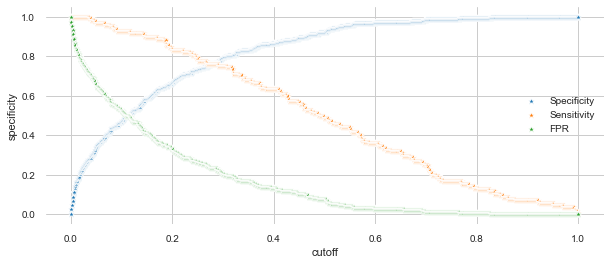

In [295]:
plt.subplots(figsize=(10,4))


sns.scatterplot(x = 'cutoff', y = 'specificity', data = roc_like_df, marker = '*', label = 'Specificity')
sns.scatterplot(x = 'cutoff', y = 'sensitivity', data = roc_like_df, marker = '*', label = 'Sensitivity')
sns.scatterplot(x = 'cutoff', y = 1-roc_like_df['specificity'], data = roc_like_df, marker = '*', label = 'FPR')




In [297]:
# Threshold = pt where Sp & Se intersect

In [299]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x : 1 if x > 0.3073 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x : 1 if x > 0.3073 else 0)

In [300]:
# ctreting confusion matrix

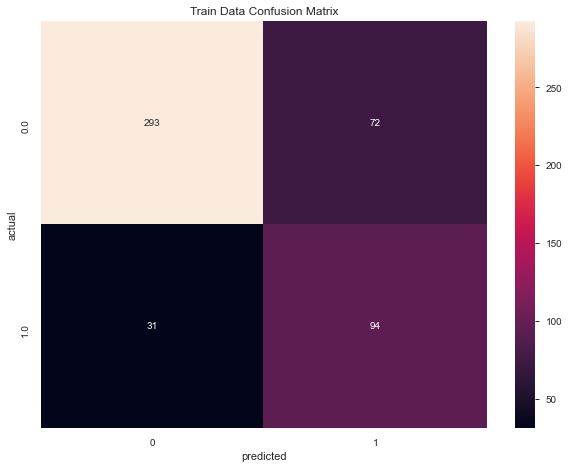

In [302]:
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()

In [307]:
accuracy_tr = (293+94)/train_X.shape[0]
accuracy_tr

0.789795918367347

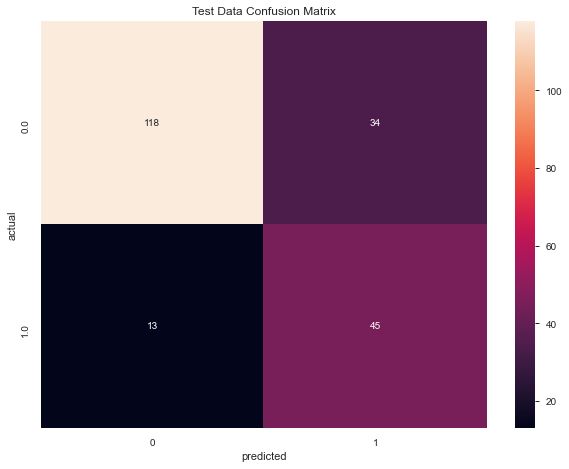

In [303]:
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [308]:
accuracy_test = (118+45)/test_X.shape[0]
accuracy_test

0.7761904761904762

In [309]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.789795918367347
The overall accuracy score for the Test Data  is :  0.7761904761904762


In [310]:
# predicting values for bankloans_new

In [311]:
from sklearn.externals import joblib
joblib.dump(result, 'log_model.pkl', compress=9)

['log_model.pkl']

In [312]:
model_clone = joblib.load('log_model.pkl')

In [316]:
bankloans_new['default'] =model_clone.predict(bankloans_new)

In [318]:
bankloans_new.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,0.011692
701,50,1,6,27,21,12.9,1.316574,1.392426,0.082107
702,40,1,9,9,33,17.0,4.880700,0.729300,0.595617
703,31,1,5,7,23,2.0,0.046000,0.414000,0.119956
704,29,1,4,0,24,7.8,0.866736,1.005264,0.369075


In [320]:
bankloans_new['decision'] = bankloans_new['default'].apply(lambda x : 1 if x > 0.3070 else 0)

In [321]:
bankloans_new['decision'].count()

150

In [322]:
bankloans_new['decision'].sum()

48

In [331]:
print('Default % in new loans acc to our model : ' + str((bankloans_new['decision'].sum()
                                                         /bankloans_new['decision'].count())*100))

Default % in new loans acc to our model : 32.0
